Original link to the tutorial is here: http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html#model-selection-choosing-estimators-and-their-parameters

# Score and cross-validated scores

In [1]:
from sklearn import datasets,svm
digits=datasets.load_digits()
X_digits=digits.data
y_digits=digits.target
svc=svm.SVC(C=1, kernel="linear")
svc.fit(X_digits[:-100],y_digits[:-100]).score(X_digits[-100:],y_digits[-100:])

0.97999999999999998

To get a better measure of prediction accuracy (which we can use as a proxy for goodness of fit of the model), we can successively split the data in folds that we use for training and testing:

In [2]:
import numpy as np
X_folds=np.array_split(X_digits,3)
y_folds=np.array_split(y_digits,3)


In [3]:
X_folds #splits the array into set number of arrays 
# This is a numpy method

[array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.],
        [  0.,   0.,   0., ...,  16.,   9.,   0.],
        ..., 
        [  0.,   0.,   5., ...,  16.,  11.,   2.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,  12.,   0.,   0.]]),
 array([[  0.,   0.,   1., ...,  16.,  16.,   8.],
        [  0.,   0.,  10., ...,  16.,  16.,   9.],
        [  0.,   0.,   6., ...,  16.,  15.,   3.],
        ..., 
        [  0.,   1.,  13., ...,   0.,   0.,   0.],
        [  0.,   1.,   7., ...,  12.,   2.,   0.],
        [  0.,   0.,  13., ...,   0.,   0.,   0.]]),
 array([[  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   7., ...,   8.,   0.,   0.],
        [  0.,   0.,  12., ...,   0.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   2., ...,  12.,   0.,   0.],
        [  0.,   0.,  10., ...,  12.,   1.,   0.]])]

In [4]:
scores=list()
for k in range(3):
    # We use list to copy, in order to pop later on
    X_train=list(X_folds)
    X_test=X_train.pop(k)
    X_train=np.concatenate(X_train)
    y_train=list(y_folds)
    y_test=y_train.pop(k)
    y_train=np.concatenate(y_train)
    scores.append(svc.fit(X_train,y_train).score(X_test,y_test))
print(scores)

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]


# Cross validation generators 
Doing the same using inbuilt Scikit learn specific cross validation methods/classes. 

This example uses the split method.

In [5]:
from sklearn.model_selection import KFold, cross_val_score
X=["a","a","b","c","c","c"]
k_fold=KFold(n_splits=3)
for train_indices,test_indices in k_fold.split(X):
    print("Train: %s | test: %s" % (train_indices,test_indices))

Train: [2 3 4 5] | test: [0 1]
Train: [0 1 4 5] | test: [2 3]
Train: [0 1 2 3] | test: [4 5]


In [6]:
# Applying the train test split using the cross validated generators 
# Applying 10 fold Cross validation
k_fold=KFold(n_splits=10)
x=[round(svc.fit(X_digits[train],y_digits[train]).score(X_digits[test],y_digits[test]),2)
for train,test in k_fold.split(X_digits)]

[0.93999999999999995,
 0.98999999999999999,
 0.93000000000000005,
 0.96999999999999997,
 0.95999999999999996,
 0.98999999999999999,
 0.96999999999999997,
 0.98999999999999999,
 0.93000000000000005,
 0.96999999999999997]

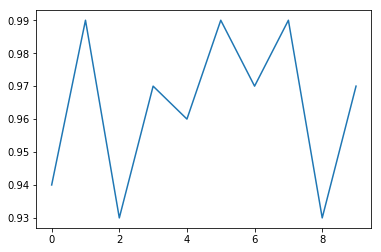

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x);
x

Alternatively, the cross validation score can be directly calculated using the cross_val_score helper. Given an estimator selected, the cross validation object and the input dataset, the cross_val_score splits the data repeatedly into training and testing set, trains the estimator using the training set and computes the scores based on the testing set for each iteration of cross validation. 

In [8]:
cross_val_score(svc ,X_digits,y_digits,cv=k_fold,n_jobs=-1) #this is the esitmator
#cv indicates the cross validation methods
# n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer
# Alternatively the scoring argument can be provided to specify an alternative scoring method


array([ 0.93888889,  0.99444444,  0.93333333,  0.96666667,  0.96111111,
        0.98888889,  0.96666667,  0.98882682,  0.93296089,  0.96648045])

In [9]:
cross_val_score(svc,X_digits,y_digits,cv=k_fold,n_jobs=-1,scoring="precision_macro")

array([ 0.94423954,  0.99411765,  0.94752137,  0.97047619,  0.96459384,
        0.98918129,  0.96713352,  0.98947368,  0.93755025,  0.96780702])

### Different types of cross validation generators
1. KFold: Splits it into k folds and trains on k-1
2. StratifiedKFold: Same as Kfold but preserves the clas distribution within each fold
3. GroupKFold: This ensures that the same group is not in both testing and training set 
4. ShuffleSplit: Generates train/test indicies based on random permutation
5. StratifiedShuffleSplit: Same as shufflesplit but preserves the class distribution
6. GroupShuffleSplit: 
7. LeaveOneGroupOut: Takes a group array to group observations
8. LeavePGroupOut
9. LeaveOneOut:
10. LeavePOut

In SVC, the C parameter represents the penalty parameter for SVM

# Grid search and cross validated estimators 

## Grid Search

Scikit-learn provides an object that given data, computes the score during the fit of an estimator on a parameter grid and chooses parameters to maximize the cross vlidation score. 

In [10]:
from sklearn.model_selection import GridSearchCV, cross_val_score
Cs=np.logspace(-6,-1,10)
clf=GridSearchCV(estimator=svc,param_grid=dict(C=Cs),
                n_jobs=-1)

In [11]:
clf.fit(X_digits[:1000],y_digits[:1000])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-06,   3.59381e-06,   1.29155e-05,   4.64159e-05,
         1.66810e-04,   5.99484e-04,   2.15443e-03,   7.74264e-03,
         2.78256e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
clf.best_score_ # Retrieving the best CV score

0.92500000000000004

In [13]:
clf.best_estimator_.C # Retrieving the estimator that produces the best CV score

0.0077426368268112772

In [14]:
# Prediction performance on test set
clf.score(X_digits[1000:],y_digits[1000:])

0.94353826850690092

By default the grid search uses 3 fold cross validation but if it detects that a classifier is passed rather than the regressor, it uses the stratified 3 fold. 

## Cross validated esitmators 
Cross validation to set a parameter can be done more efficiently on an algo by algo basis. This is why for certain estimators, scikit learn exposes cross-validation: evaluating estimator performance estimators that set their parameter automatically by cross validation>

In [15]:
from sklearn import linear_model, datasets
lasso=linear_model.LassoCV()
diabetes=datasets.load_diabetes()
X_diabetes=diabetes.data
y_diabetes=diabetes.target

In [16]:
lasso.fit(X_diabetes,y_diabetes)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [17]:
lasso.alpha_

0.012291895087486173

In [21]:
# Grid search to find the best alphas for the lasso using GridSearch
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

diabetes=datasets.load_diabetes()
X=diabetes.data[:150]
y=diabetes.target[:150]

lasso=Lasso(random_state=0) # How is this different from the LassoCV?
alphas=np.logspace(-4,-0.5,30)

In [22]:
tuned_parameters=[{"alpha":alphas}]
n_folds=3

clf=GridSearchCV(lasso,tuned_parameters,cv=n_folds,refit=False)
clf.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([  1.00000e-04,   1.32035e-04,   1.74333e-04,   2.30181e-04,
         3.03920e-04,   4.01281e-04,   5.29832e-04,   6.99564e-04,
         9.23671e-04,   1.21957e-03,   1.61026e-03,   2.12611e-03,
         2.80722e-03,   3.70651e-03,   4.89390e-03,   6.46167e-03,
         8...   7.88046e-02,   1.04050e-01,   1.37382e-01,   1.81393e-01,
         2.39503e-01,   3.16228e-01])}],
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
scores=clf.cv_results_["mean_test_score"]
scores_std=clf.cv_results_["std_test_score"]

In [24]:
scores

array([ 0.34908311,  0.34919799,  0.34934947,  0.34954908,  0.34981211,
        0.35015826,  0.35061336,  0.35121121,  0.35199462,  0.35301935,
        0.35435493,  0.35608875,  0.35832605,  0.36119022,  0.36479555,
        0.36855937,  0.37102098,  0.37373637,  0.37536354,  0.37701536,
        0.37935476,  0.38233056,  0.38443899,  0.3865947 ,  0.38753399,
        0.38591916,  0.38284243,  0.37482125,  0.35843308,  0.33333268])

In [25]:
scores_std

array([ 0.17451241,  0.17448011,  0.1744375 ,  0.1743812 ,  0.17430675,
        0.1742083 ,  0.17407837,  0.17390614,  0.17367848,  0.17337632,
        0.17297589,  0.17244278,  0.17173247,  0.17078123,  0.16949033,
        0.16846833,  0.16992247,  0.17138926,  0.17153247,  0.17130395,
        0.1705762 ,  0.16916414,  0.16609894,  0.16221667,  0.15727615,
        0.15191842,  0.14319706,  0.13466461,  0.12712241,  0.12229845])